# Individual Analysis for the Franck-Hertz Experiment

Use this template to carry out the analysis tasks for the experiment.  You may need to consult the documentation for different Python packages.  Also recommended: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

We will also be using [**LMFit**](https://lmfit.github.io/lmfit-py/) for curve fitting 
and the [Uncertainties](https://pythonhosted.org/uncertainties/) package for calculating statistical uncertainty. 

In [1]:
# Run this cell with Shift-Enter, and wait until the asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as up
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import LinearModel, QuadraticModel

%matplotlib inline 

## Summary of tasks

### Prior to working on this notebook

1. Watch the videos on the experiment and work out at least exercises 2 and 3 on the mean free path of electrons in the mercury F-H tube given in the experiment instructions.  These will be relevant to the "RSB" method of analyzing Franck-Hertz data.


2. Read through the paper by Rapior, Sengstock and Baev (RSB) linked on the experiment page: Rapior, G., K. Sengstock, and V Baev, <a href="http://courses.washington.edu/phys432/restricted/AJP_rapior_sengstock_baev.pdf" target="_blank">"New features of the Franck-Hertz experiment,"</a> <i>Am. J. Phys.,</i> <strong>74</strong>, p. 423-428 (2006).  Also study the lecture notes on this paper.


3. Download the PDFs of the chart-recorder scans for the two Franck-Hertz data runs (one for Hg, the other for Ne).


4. Extract from the scans the positions in paper-grid units of (1) calibration marks, (2) positions of anode current minima ("troughs") and maxima ("peaks"), and, for neon (3) positions of the small features (tiny peaks and troughs) seen in the neon-scan lock-in amp output.  The separations of similar features will be used to estimate the 3s-3p state separation.  **You do not need to estimate the uncertainty in these measurements**, but make your estimates of position to within 1/10 of small square.


5. Assign numbers to each anode current feature, for example, 1, 2, 3,... for peak 1, peak 2, peak 3... and similarly for the troughs.  (Not necessary for the Ne lock-in scan; these will be analyzed differently.)


6. Create spreadsheets with these data to be read into the notebook for further processing.

### Tasks for this notebook

For the neon data set:

* Plot and fit the calibration data.  Create a calibration function to turn feature positions into voltages.


* Apply the calibration to all of the position measurements.


* For the anode current peaks and troughs, analyze each set in three different ways:
  1. Fit a line through the peak/trough position vs. number.  From this obtain the average energy difference.
  2. Fit a quadratic through the peak/trough positions vs. number.  From this obtain the fit parameters to use in the RSB formalism.
  3. Take first differences of the peak/trough positions, and plot/fit these to a line.  The fit line should extrapolate to the energy of the first excited state, acccording to the RSB formalism.  Test this idea with a calculation from the fit.


* From the measurements taken from the lock-in scan for neon, take differences between adjacent features that indicate transitions between the 3s and 3p states.  Look at the list of differences to see if they have about the same value, and check any outliers against the original XY plot.  Then calculate an average and uncertainty to compare to the expected 1.7 V average separation between these states.

For the mercury data set:

* Plot and fit the calibration data.  Create a calibration function to turn feature positions into voltages.


* Apply the calibration to all of the position measurements.


* For the anode current peaks and troughs, analyze each set in three different ways:
  1. Fit a line through the peak/trough position vs. number.  From this obtain the average energy difference.
  2. Fit a quadratic through the peak/trough positions vs. number.  From this obtain the fit parameters to use in the RSB formalism.
  3. Take first differences of the peak/trough positions, and plot/fit these to a line.  The fit line should extrapolate to the energy of the first excited state, acccording to the RSB formalism.  Test this idea with a calculation from the fit.

* Use the fit coefficients associated with the RSB method to estimate the mean free path of the electrons between collisions with Hg atoms.  You will also need a dimension from the picture of the Hg tube.  Compare this result to the one calculated from the exercises and to the results cited by RSB in their paper.


## Read in the Franck-Hertz Data

You will probably want 4 to 5 different DataFrames: Neon calibration, neon peak/trough positions, neon small-feature positions, Mercury calibration, and mercury peak/trough positions.

One way to do it is create a different CSV file for each DataFrame.  Another way is to put each spreadsheet on a different Excel sheet within a single Excel file.  You can read the whole file into a Pandas "OrderedDict"
with the command 

    `FHdata = pd.read_excel('Franck-Hertz_data.xlsx', sheet_name = None)`

Then each sheet will be in its own DataFrame that you would reference with `FHdata['sheet-name']`.

In [2]:
# Example
#FHdata = pd.read_excel('Franck-Hertz_data.xlsx',sheet_name=None)      
# The keys are the sheet names
#FHdata.keys()

# Read in data from Ne_calibration, Ne_positions, Hg_calibration, Hg_positions
Ne_calib = pd.read_csv('Ne_calibration.CSV')
Ne_posi = pd.read_csv('Ne_positions.CSV')
Hg_calib = pd.read_csv('Hg_calibration.CSV')
Hg_posi = pd.read_csv('Hg_positions.CSV')
Ne_lockin = pd.read_csv('Ne_lockin.CSV')

## Neon Analysis

Calibration first.  Fit a line to the calibration data, create a calibration function.

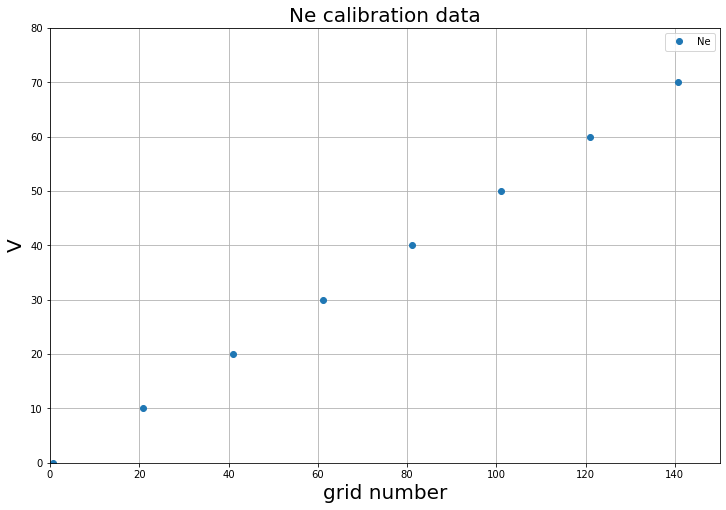

In [3]:
# Look at the calibration data first 

plt.figure(figsize=(12,8))
plt.grid()
plt.title('Ne calibration data',fontsize=20)
plt.ylabel(r'V',fontsize=20)
plt.xlabel(r'grid number',fontsize=20)
plt.xlim(0,150)
plt.ylim(0,80)
plt.plot(Ne_calib['grid'],Ne_calib['V'],'o',label='Ne')
plt.legend();

### Fit a line

You know how to do this.  Save the fit results to use in the calibration function

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 8
    # variables        = 2
    chi-square         = 0.04920354
    reduced chi-square = 0.00820059
    Akaike info crit   = -36.7298497
    Bayesian info crit = -36.5709666
[[Variables]]
    slope:      0.49942931 +/- 6.9787e-04 (0.14%) (init = 0.4994293)
    intercept: -0.44075253 +/- 0.05897084 (13.38%) (init = -0.4407525)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.840


name,value,standard error,relative error,initial value,min,max,vary
slope,0.49942931,6.9787e-04,(0.14%),0.49942931166635424,-inf,inf,True
intercept,-0.44075253,0.05897084,(13.38%),-0.44075252912366203,-inf,inf,True


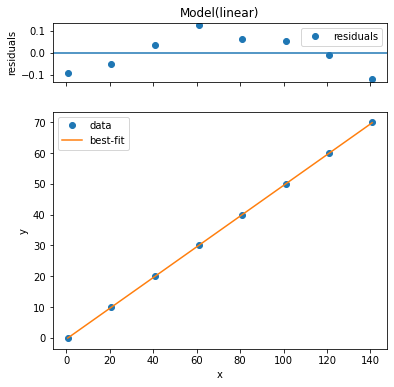

In [4]:
##  Hint: make a function to do the fitting and plotting of the fit
##  Have it return the fit parameters as a Parameters object, like this
##
## def model_fit_and_plot(xdata,ydata,model=LinearModel()):
##     #
##     # Your code here 
##     #
##     return model_fit.params

def model_fit_and_plot(xdata, ydata, model=LinearModel(), plot=True, force_zero=False):
    param_guess = model.guess(ydata, x=xdata)
    if force_zero=='linear':
        param_guess['intercept'].set(value=0, vary=False)
    if force_zero=='quadratic':
        param_guess['c'].set(value=0, vary=False)

    line_fit = model.fit(ydata, param_guess, x=xdata)
    if plot==True:
        print(line_fit.fit_report())
        line_fit.plot();

    return line_fit.params

Ne_fit_result = model_fit_and_plot(Ne_calib['grid'], Ne_calib['V'])
Ne_fit_result

### Write a calibration function

Pass your fit constants to the calibration function.  Test it.

In [5]:
def Ne_find_V(loc):
    V = (Ne_fit_result['slope'].value * loc) + Ne_fit_result['intercept'].value
    return V

# test the function; grid location 61.2 should give a votale of about 30
Ne_find_V(61.2)

30.124321344857222

### Apply the calibration

You might want to add columns of the calibrated data to the existing DataFrame, or make new DataFrames or arrays.  It is up to you.

In [6]:
Ne_posi['V_max'] = Ne_find_V(Ne_posi['max'])
Ne_posi['V_min'] = Ne_find_V(Ne_posi['min'])

Ne_posi

,ind,max,min,V_max,V_min
0,1,27.9,43.2,13.493325,21.134594
1,2,62.1,77.6,30.573808,38.314962
2,3,98.1,115.5,48.553263,57.243333
3,4,137.6,0.0,68.280721,-0.440753


Make a plot, just to check that it looks OK.

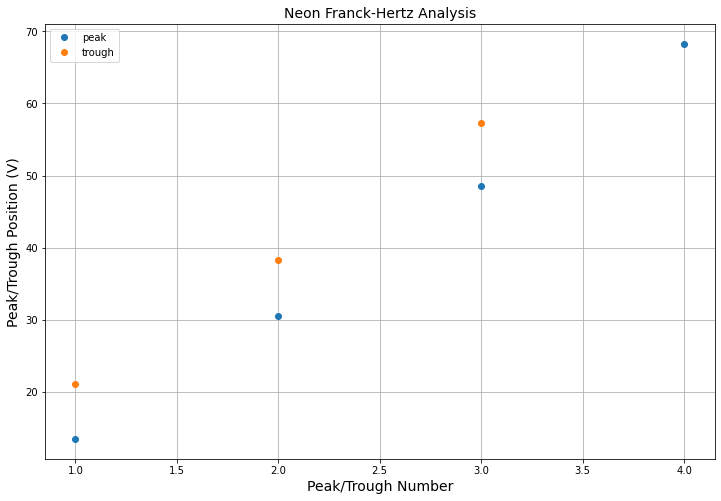

In [7]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Neon Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)
plt.plot(Ne_posi['ind'], Ne_posi['V_max'], 'o', label='peak')
plt.plot(Ne_posi['ind'][:3], Ne_posi['V_min'][:3], 'o', label='trough')

plt.legend();

### Fit the peak/trough positions 

Fit the peak and trough positions versus number in two different ways: with a line, to find the average spacing, and with a quadratic, to find the coefficients to apply to the model of RSB.  Save the fit results.  Recommended: just same the `params` object as a whole.

To fit to a quadratic, you may us the `QuadraticModel` in exactly the same way as the `LinearModel`.  Look up **QuadraticModel** in the LMFit documenation for details.

#### Neon troughs first

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 3
    # variables        = 2
    chi-square         = 0.50925218
    reduced chi-square = 0.50925218
    Akaike info crit   = -1.32027272
    Bayesian info crit = -3.12304814
[[Variables]]
    slope:      18.0543696 +/- 0.50460488 (2.79%) (init = 18.05437)
    intercept:  2.78889035 +/- 1.09007113 (39.09%) (init = 2.78889)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.926


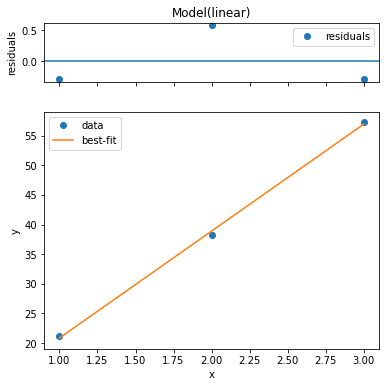

In [8]:
# Troughs line fit
Ne_trough_result_lin = model_fit_and_plot(Ne_posi['ind'][:3], Ne_posi['V_min'][:3])

[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 3
    # variables        = 3
    chi-square         = 3.000e-250
    reduced chi-square = 0.00000000
    Akaike info crit   = -1720.93882
    Bayesian info crit = -1723.64298
##  Warning: uncertainties could not be estimated:
    a:  at initial value
    b:  at initial value
    c:  at initial value
[[Variables]]
    a:  0.87400130 +/- 0.00000000 (0.00%) (init = 0.8740013)
    b:  14.5583644 +/- 0.00000000 (0.00%) (init = 14.55836)
    c:  5.70222800 +/- 0.00000000 (0.00%) (init = 5.702228)


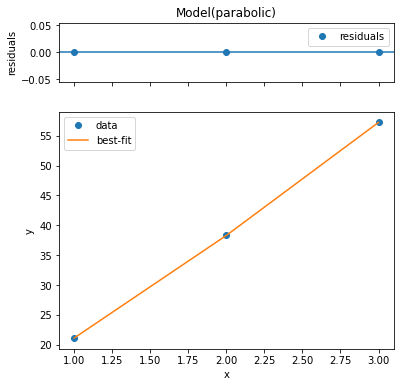

In [9]:
# Now with a quadratic
Ne_trough_result_qua = model_fit_and_plot(Ne_posi['ind'][:3], Ne_posi['V_min'][:3], model=QuadraticModel())

#### Now neon peaks

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 4
    # variables        = 2
    chi-square         = 1.78766221
    reduced chi-square = 0.89383111
    Akaike info crit   = 0.77845751
    Bayesian info crit = -0.44895377
[[Variables]]
    slope:      18.2341642 +/- 0.42280754 (2.32%) (init = 18.23416)
    intercept: -5.36013125 +/- 1.15790615 (21.60%) (init = -5.360131)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.913


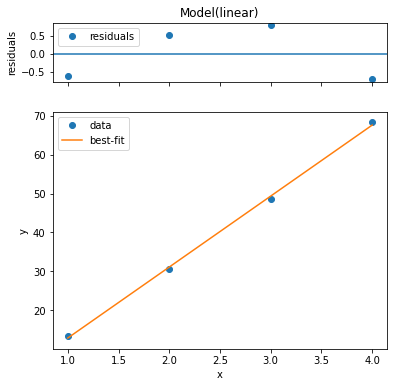

In [10]:
# Peaks line fit
Ne_peak_result_lin = model_fit_and_plot(Ne_posi['ind'], Ne_posi['V_max'])

[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 4
    # variables        = 3
    chi-square         = 0.03604258
    reduced chi-square = 0.03604258
    Akaike info crit   = -12.8373942
    Bayesian info crit = -14.6785111
[[Variables]]
    a:  0.66174384 +/- 0.09492440 (14.34%) (init = 0.6617438)
    b:  14.9254450 +/- 0.48215619 (3.23%) (init = 14.92544)
    c: -2.05141206 +/- 0.52851675 (25.76%) (init = -2.051412)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.984
    C(b, c) = -0.955
    C(a, c) =  0.898


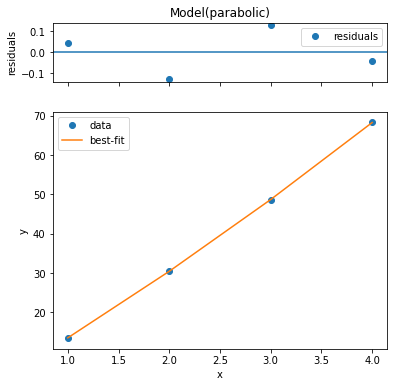

In [11]:
# Peaks quadratic
Ne_peak_result_qua = model_fit_and_plot(Ne_posi['ind'], Ne_posi['V_max'], model=QuadraticModel())

### Plot the fitlines over the data

Show, on a single plot, the peak positions, the trough positions (both as dots) with fit lines and fit curves for each.  One member of the grou should include this plot in your Group Document.

Use the `model.eval()` function with the saved parameters to build fit lines. 

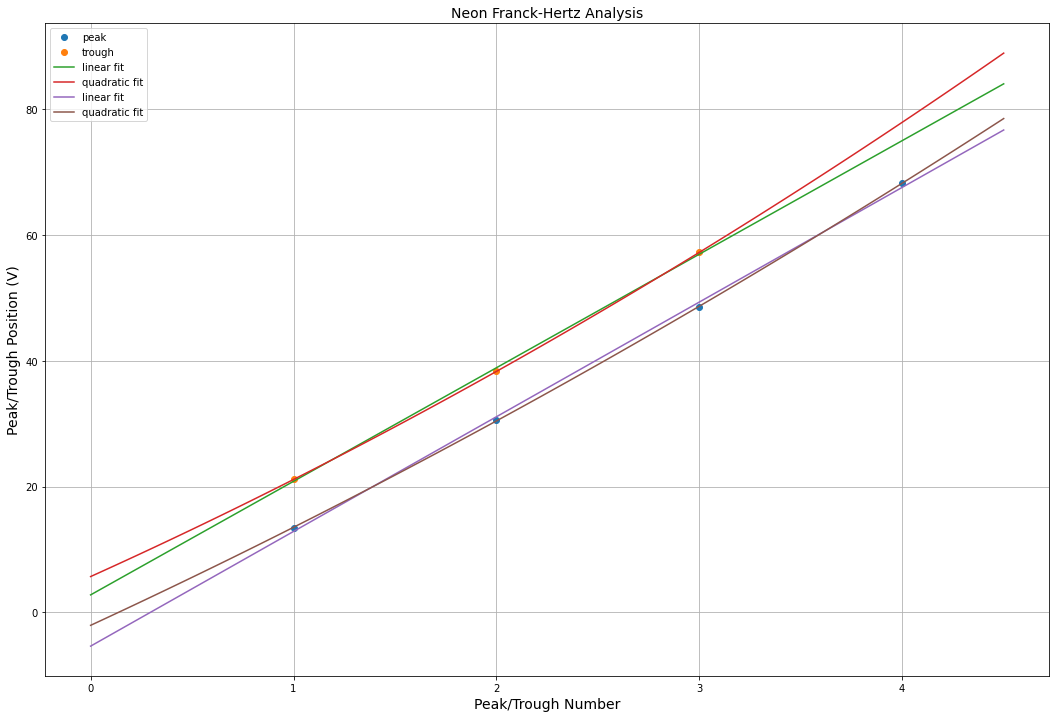

In [12]:
# For a smooth curve make an x range with a bunch of points.  100 should be fine.
xfit = np.linspace(0,4.5,100) 
trough_line_lin = LinearModel().eval(Ne_trough_result_lin,x=xfit)
trough_line_qua = QuadraticModel().eval(Ne_trough_result_qua, x=xfit)
peak_line_lin = LinearModel().eval(Ne_peak_result_lin,x=xfit)
peak_line_qua = QuadraticModel().eval(Ne_peak_result_qua, x=xfit)

# Then redo the above plot with fit lines and curves
plt.figure(figsize=(18,12))
plt.grid()
plt.title('Neon Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)
plt.plot(Ne_posi['ind'], Ne_posi['V_max'], 'o', label='peak')
plt.plot(Ne_posi['ind'][:3], Ne_posi['V_min'][:3], 'o', label='trough')
plt.plot(xfit, trough_line_lin, label='linear fit')
plt.plot(xfit, trough_line_qua, label='quadratic fit')
plt.plot(xfit, peak_line_lin, label='linear fit')
plt.plot(xfit, peak_line_qua, label='quadratic fit')

plt.legend();

### Take differences in peak/trough positions

Next, apply the RSB approach as they describe it, by taking the <i>differences</i> in the positions of subsequent features to create an array $\Delta E(n) = E_n - E_{n-1}$; note $n$ is the upper number.

Then, plot and fit these to a line.  The energy of the lowest excited state should be given by $\Delta E(0.5)$.  Save the fit parameters as before.

In [13]:
# Recommended: use Python "List comprehensions"  See the Python text on how to make these
Ne_trough_diffs = [j-i for i, j in zip(Ne_posi['V_min'][:-1], Ne_posi['V_min'][1:3])]
Ne_peak_diffs = [j-i for i, j in zip(Ne_posi['V_max'][:-1], Ne_posi['V_max'][1:])]

# Have a look at them, e.g., 
print('List of Neon peak differences (V):', Ne_peak_diffs)
print('List of Neon trough differences (V):', Ne_trough_diffs)

List of Neon peak differences (V): [17.080482458989316, 17.97945521998875, 19.727457810821]
List of Neon trough differences (V): [17.180368321322582, 18.928370912154826]


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 2
    # variables        = 2
    chi-square         = 2.000e-250
    reduced chi-square = 0.00000000
    Akaike info crit   = -1147.29255
    Bayesian info crit = -1149.90625
##  Warning: uncertainties could not be estimated:
    slope:      at initial value
    intercept:  at initial value
[[Variables]]
    slope:      1.74800259 +/- 0.00000000 (0.00%) (init = 1.748003)
    intercept:  13.6843631 +/- 0.00000000 (0.00%) (init = 13.68436)


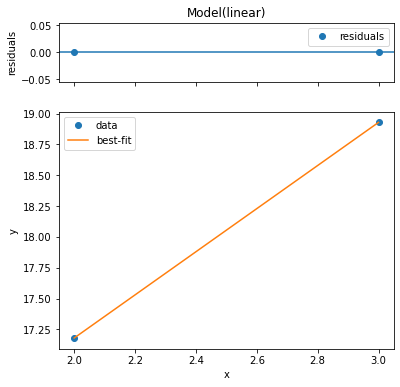

In [14]:
# Fit of line to trough diffs
Ne_trough_diff_fit = model_fit_and_plot([2,3], Ne_trough_diffs)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 3
    # variables        = 2
    chi-square         = 0.12014194
    reduced chi-square = 0.12014194
    Akaike info crit   = -5.65308102
    Bayesian info crit = -7.45585644
[[Variables]]
    slope:      1.32348768 +/- 0.24509380 (18.52%) (init = 1.323488)
    intercept:  14.2920021 +/- 0.76202758 (5.33%) (init = 14.292)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.965


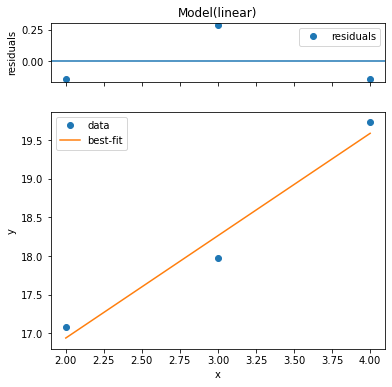

In [15]:
# Next, peak diffs
Ne_peak_diff_fit = model_fit_and_plot([2,3,4], Ne_peak_diffs)

### Make a differences plot

Show, on a single plot, the peak position differences, the trough position differences (both as dots) with fit lines for each.  One member of the grou should include this plot in your Group Document.

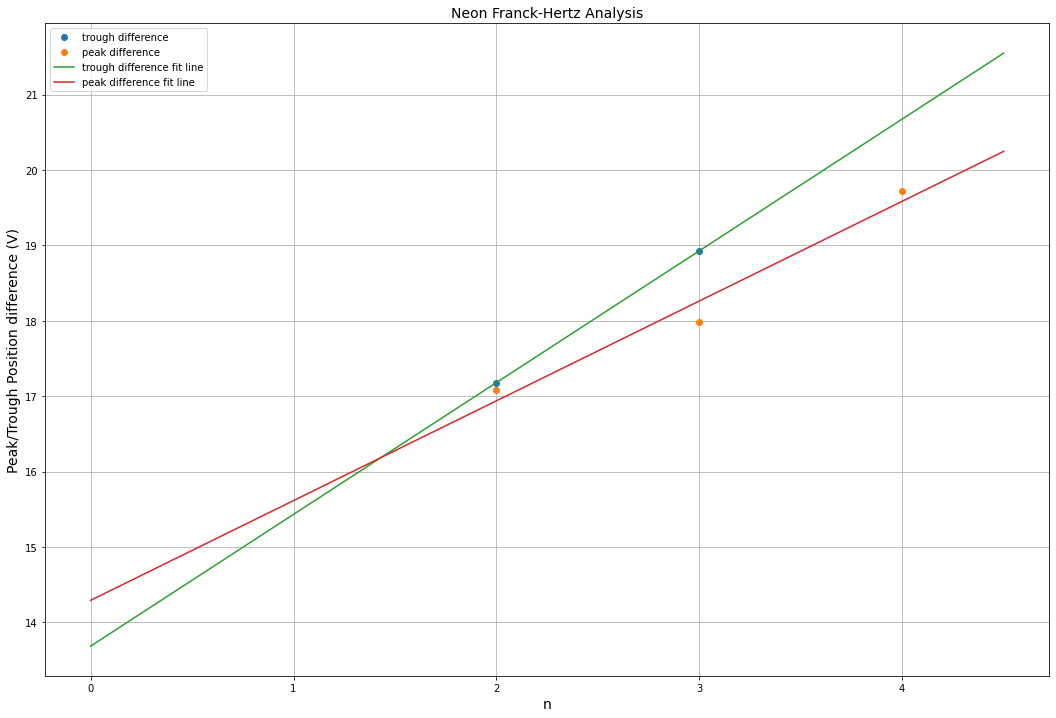

In [16]:
# Plot here
xfit = np.linspace(0,4.5,100) 
trough_diff_line = LinearModel().eval(Ne_trough_diff_fit,x=xfit)
peak_diff_line = LinearModel().eval(Ne_peak_diff_fit,x=xfit)

plt.figure(figsize=(18,12))
plt.grid()
plt.title('Neon Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position difference (V)',fontsize=14)
plt.xlabel('n',fontsize=14)
plt.plot([2,3], Ne_trough_diffs, 'o', label='trough difference')
plt.plot([2,3,4], Ne_peak_diffs, 'o', label='peak difference')
plt.plot(xfit, trough_diff_line, label='trough difference fit line')
plt.plot(xfit, peak_diff_line, label='peak difference fit line')

plt.legend();

## Final results for neon excited state

Compare fit coefficients from the quadratic to similar from the RSB difference method.  Then calculate values for the lowest excited state of Neon from the three methods of analyzing the data set: simple average peak spacing, and RSB calculation from the results of the other two fits.

From the RSB analysis, expect energy troughs to follow

$$ E_n = E_a\frac{\lambda}{L}n^2 + E_an + c  = an^2 + bn +c$$

where $c$ is a constant, $n$ is the trough number, $\lambda/L$ is the ratio of the mean free path to the total travel distance from electrode to electrode, and $E_a$ is the lowest excited state.

Taking differences, RSB derive

$$ \Delta E(n) = E_{n} - E_{n-1} = E_a\left(1-\frac{\lambda}{L}\right) + E_a2\frac{\lambda}{L}n = p + mn$$

Thus, a quadratic fit to the trough positions should give $E_a$ as the linear-term coefficient, and a linear fit to  the differences in trough positions should give a line that evaluates to $E_a$ for $n=0.5$.

Further, if $m$ and $p$ are the slope and intercept of the linear fit to the differences, and $a$, $b$, and $c$ are the 2nd, 1st and 0th order coefficients in the quadratic fit to trough positions, then we expect $p=b-a$ and $m=2a$.

In [17]:
print('CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD')
print('Troughs analysis:')
# Your code here 
m_tr = unc.ufloat(Ne_trough_diff_fit['slope'].value, Ne_trough_diff_fit['slope'].stderr)
p_tr = unc.ufloat(Ne_trough_diff_fit['intercept'].value, Ne_trough_diff_fit['intercept'].stderr)
a_tr = unc.ufloat(Ne_trough_result_qua['a'].value, Ne_trough_result_qua['a'].stderr)
b_tr = unc.ufloat(Ne_trough_result_qua['b'].value, Ne_trough_result_qua['b'].stderr)
print(Ne_trough_result_qua['b'].stderr)
print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p_tr,b_tr-a_tr,b_tr,a_tr))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m_tr,2*a_tr,a_tr))


print('\nPeaks analysis:')
# Your code here
m_pk = unc.ufloat(Ne_peak_diff_fit['slope'].value, Ne_peak_diff_fit['slope'].stderr)
p_pk = unc.ufloat(Ne_peak_diff_fit['intercept'].value, Ne_peak_diff_fit['intercept'].stderr)
a_pk = unc.ufloat(Ne_peak_result_qua['a'].value, Ne_peak_result_qua['a'].stderr)
b_pk = unc.ufloat(Ne_peak_result_qua['b'].value, Ne_peak_result_qua['b'].stderr)
print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p_pk,b_pk-a_pk,b_pk,a_pk))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m_pk,2*a_pk,a_pk))


print('\n\nCALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS')

Ea_trad_pk = unc.ufloat(Ne_peak_result_lin['slope'].value, Ne_peak_result_lin['slope'].stderr)
Ea_trad_tr = unc.ufloat(Ne_trough_result_lin['slope'].value, Ne_trough_result_lin['slope'].stderr)
print('"Traditional" average peak spacing: {:.3uP} eV'.format(Ea_trad_pk))
print('"Traditional" average trough spacing: {:.3uP} eV'.format(Ea_trad_tr))

# From quadratic fit, see E_a as parameter b
# From RSB n=1/2 method, E_a = p + m/2
# Use the trough values

# Your code here
print('\nRSB method using line fit to peak/trough position differences: {:.2uP} eV'.format(p_tr+m_tr/2))

# Your code here
print('\nRSB method using quadratic fit to peak/trough positions: {:.2uP} eV'.format(b_tr))

CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD
Troughs analysis:
0.0
p ?= b-a: 13.68+/-0 ?= 13.68+/-0 = 14.56+/-0-0.87+/-0
m ?= 2a: 1.75+/-0 ?= 1.75+/-0 = 2*0.87+/-0

Peaks analysis:
p ?= b-a: 14.29+/-0.76 ?= 14.26+/-0.49 = 14.93+/-0.48-0.66+/-0.09
m ?= 2a: 1.32+/-0.25 ?= 1.32+/-0.19 = 2*0.66+/-0.09


CALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS
"Traditional" average peak spacing: 18.234±0.423 eV
"Traditional" average trough spacing: 18.054±0.505 eV

RSB method using line fit to peak/trough position differences: 14.558364435074221±0 eV

RSB method using quadratic fit to peak/trough positions: 14.558364435074227±0 eV


## Calculate the 3p-3s energy spacing

Calculate the differences between similar closely spaced features in the lock-in scan for neon.  Convert paper positions to voltages first, then take differences and make a list.  See if they are similar values.  Then take an average.

In [18]:
#
# Your code here 
Ne_lockin['V_diff'] = Ne_find_V(Ne_lockin['loc_hi']) - Ne_find_V(Ne_lockin['loc_lo'])
udE_3p3s = sum(Ne_lockin['V_diff'])/len(Ne_lockin['V_diff'])

print('Energy difference measurements (V)')
print(list(Ne_lockin['V_diff']))
print('Measured average energy difference 3p-3s for neon: {:.2f} eV'.format(udE_3p3s))

Energy difference measurements (V)
[1.8478884531655169, 1.5482308661656958, 1.8978313843321502, 1.8478884531655098, 1.5482308661656958, 2.04766017783205, 1.8478884531655027, 1.7480025908322432, 1.7979455219988836]
Measured average energy difference 3p-3s for neon: 1.79 eV


## Mercury Analysis

Calibration first.  Fit a line to the calibration data, create a calibration function.

,V,grid
0,0,11.0
1,10,41.0
2,20,70.9
3,30,100.7
4,40,130.3


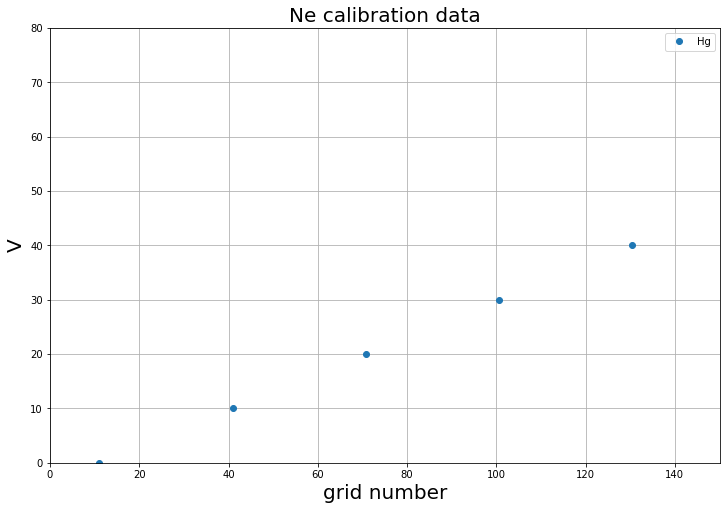

In [19]:
# Show calibration data 
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Ne calibration data',fontsize=20)
plt.ylabel(r'V',fontsize=20)
plt.xlabel(r'grid number',fontsize=20)
plt.xlim(0,150)
plt.ylim(0,80)
plt.plot(Hg_calib['grid'],Hg_calib['V'],'o',label='Hg')
plt.legend();
Hg_calib

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 5
    # variables        = 2
    chi-square         = 0.00663044
    reduced chi-square = 0.00221015
    Akaike info crit   = -29.1276069
    Bayesian info crit = -29.9087311
[[Variables]]
    slope:      0.33523076 +/- 4.9837e-04 (0.15%) (init = 0.3352308)
    intercept: -3.72763349 +/- 0.04106522 (1.10%) (init = -3.727633)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.859


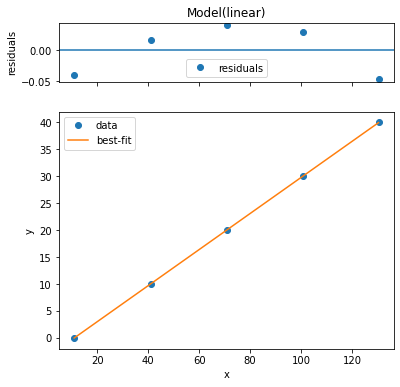

In [20]:
# fit it and get the constants
Hg_fit_result = model_fit_and_plot(Hg_calib['grid'], Hg_calib['V'])

In [21]:
# Make and test calibration function
def Hg_find_V(loc):
    V = (Hg_fit_result['slope'].value * loc) + Hg_fit_result['intercept'].value
    return V

# Test the calibration function; location of 70.9 should give about 20V
Hg_find_V(70.9)

20.040227691701862

### Apply the calibration

Change peak/trough positions into voltages.

In [22]:
# Show the Hg peak/trough positions 
Hg_posi

,ind,max,min
0,1,31.0,36.0
1,2,45.0,50.5
2,3,59.2,65.2
3,4,74.0,80.1
4,5,88.7,95.2
5,6,104.0,111.0
6,7,119.4,126.8


In [23]:
# Calibrate 
# Recommended: make a new Dataframe.
Hg_posi['V_max'] = Hg_find_V(Hg_posi['max'])
Hg_posi['V_min'] = Hg_find_V(Hg_posi['min'])

Hg_posi

,ind,max,min,V_max,V_min
0,1,31.0,36.0,6.664520,8.340674
1,2,45.0,50.5,11.357751,13.201520
2,3,59.2,65.2,16.118028,18.129412
3,4,74.0,80.1,21.079443,23.124351
4,5,88.7,95.2,26.007335,28.186335
5,6,104.0,111.0,31.136366,33.482981
6,7,119.4,126.8,36.298920,38.779627


### Plot and check

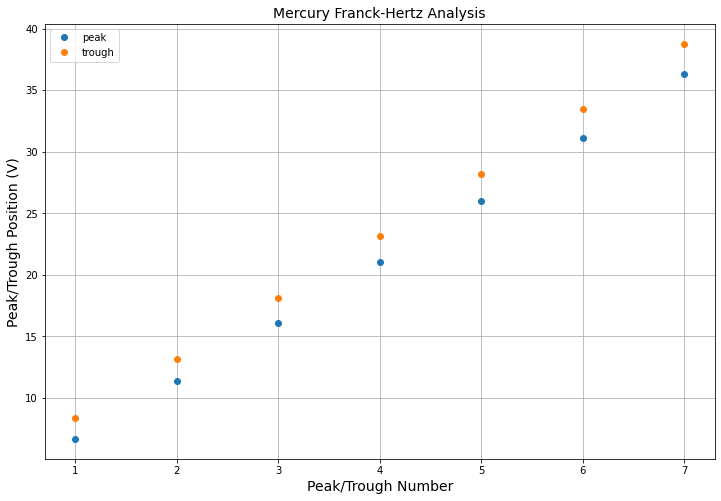

In [24]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Mercury Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)
plt.plot(Hg_posi['ind'], Hg_posi['V_max'], 'o', label='peak')
plt.plot(Hg_posi['ind'], Hg_posi['V_min'], 'o', label='trough')

plt.legend();

### Fit positions

As before, fit the peak and trough positions to a line ("traditional") and a quadratic (part of RSB method).  Save the parameters.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 7
    # variables        = 2
    chi-square         = 0.21079214
    reduced chi-square = 0.04215843
    Akaike info crit   = -20.5195502
    Bayesian info crit = -20.6277299
[[Variables]]
    slope:      5.06916806 +/- 0.03880281 (0.77%) (init = 5.069168)
    intercept:  3.04402795 +/- 0.17353145 (5.70%) (init = 3.044028)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.894


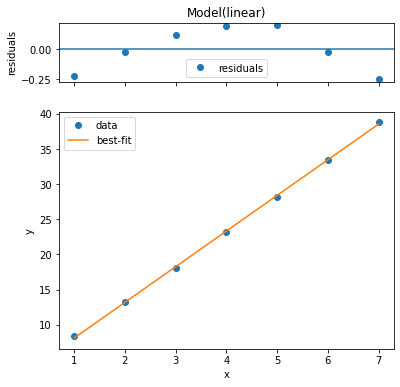

In [25]:
# Line fit, troughs
Hg_trough_result_lin = model_fit_and_plot(Hg_posi['ind'], Hg_posi['V_min'])

[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 7
    # variables        = 3
    chi-square         = 0.00508384
    reduced chi-square = 0.00127096
    Akaike info crit   = -44.5931871
    Bayesian info crit = -44.7554566
[[Variables]]
    a:  0.04948645 +/- 0.00388979 (7.86%) (init = 0.04948645)
    b:  4.67327649 +/- 0.03183931 (0.68%) (init = 4.673276)
    c:  3.63786530 +/- 0.05555733 (1.53%) (init = 3.637865)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.977
    C(b, c) = -0.924
    C(a, c) =  0.840


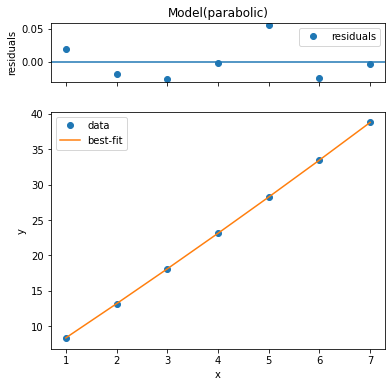

In [26]:
# Quadratic fit, troughs
Hg_trough_result_qua = model_fit_and_plot(Hg_posi['ind'], Hg_posi['V_min'], model=QuadraticModel())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 7
    # variables        = 2
    chi-square         = 0.20577519
    reduced chi-square = 0.04115504
    Akaike info crit   = -20.6881680
    Bayesian info crit = -20.7963477
[[Variables]]
    slope:      4.94106201 +/- 0.03833827 (0.78%) (init = 4.941062)
    intercept:  1.47323237 +/- 0.17145395 (11.64%) (init = 1.473232)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.894


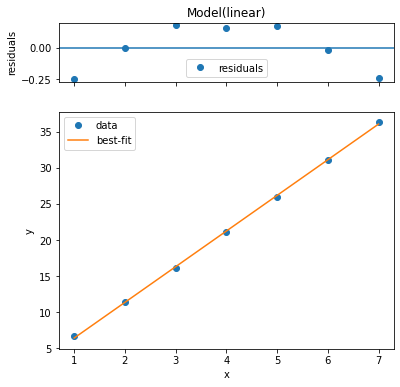

In [27]:
# Line fit, peaks
Hg_peak_result_lin = model_fit_and_plot(Hg_posi['ind'], Hg_posi['V_max'])

[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 7
    # variables        = 3
    chi-square         = 0.00337139
    reduced chi-square = 8.4285e-04
    Akaike info crit   = -47.4683822
    Bayesian info crit = -47.6306518
[[Variables]]
    a:  0.04908736 +/- 0.00316763 (6.45%) (init = 0.04908736)
    b:  4.54836312 +/- 0.02592820 (0.57%) (init = 4.548363)
    c:  2.06228071 +/- 0.04524285 (2.19%) (init = 2.062281)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.977
    C(b, c) = -0.924
    C(a, c) =  0.840


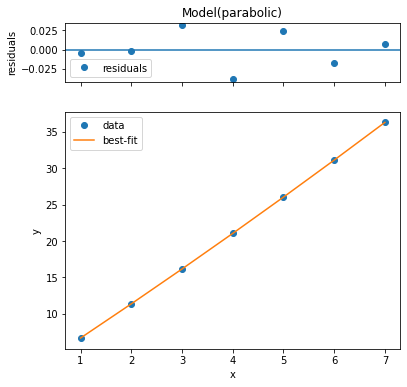

In [28]:
# Quadratic fit, peaks
Hg_peak_result_qua = model_fit_and_plot(Hg_posi['ind'], Hg_posi['V_max'], model=QuadraticModel())

### Make a plot

Show, on a single plot, the peak positions, the trough positions (both as dots) with fit lines and fit curves for each.  One member of the grou should include this plot in your Group Document.

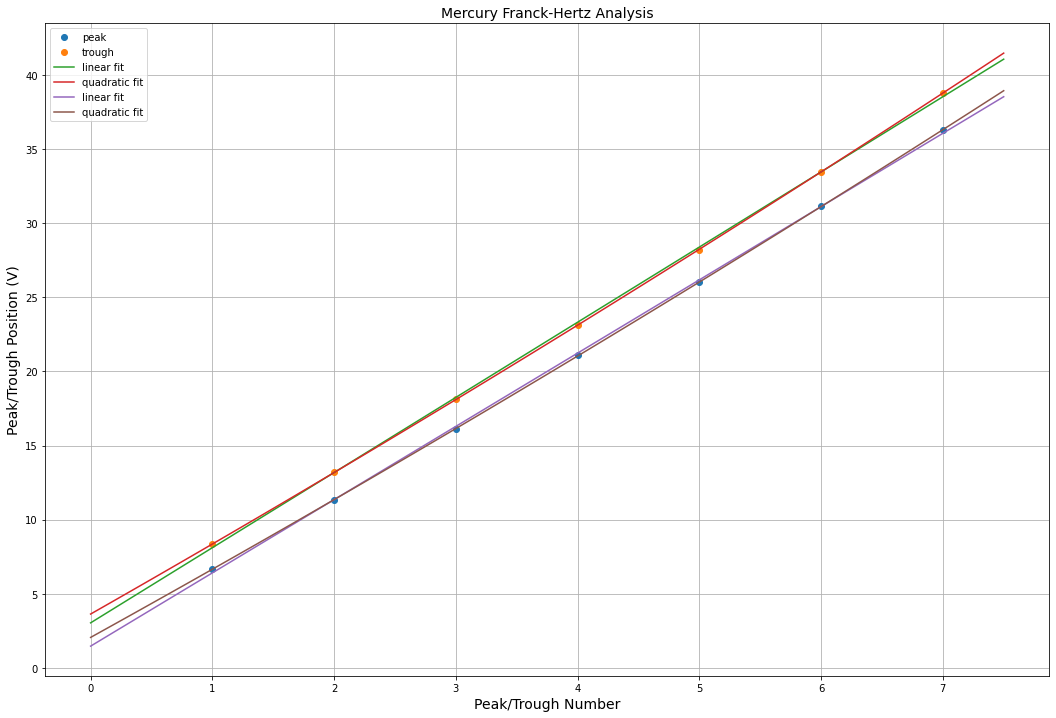

In [29]:
# For a smooth curve make an x range with a bunch of points.  100 should be fine.
xfit = np.linspace(0,7.5,100) 
trough_line_lin = LinearModel().eval(Hg_trough_result_lin,x=xfit)
trough_line_qua = QuadraticModel().eval(Hg_trough_result_qua, x=xfit)
peak_line_lin = LinearModel().eval(Hg_peak_result_lin,x=xfit)
peak_line_qua = QuadraticModel().eval(Hg_peak_result_qua, x=xfit)

# Then redo the above plot with fit lines and curves
plt.figure(figsize=(18,12))
plt.grid()
plt.title('Mercury Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)
plt.plot(Hg_posi['ind'], Hg_posi['V_max'], 'o', label='peak')
plt.plot(Hg_posi['ind'], Hg_posi['V_min'], 'o', label='trough')
plt.plot(xfit, trough_line_lin, label='linear fit')
plt.plot(xfit, trough_line_qua, label='quadratic fit')
plt.plot(xfit, peak_line_lin, label='linear fit')
plt.plot(xfit, peak_line_qua, label='quadratic fit')

plt.legend();

### Calculate peak/trough differences

As before, carry out the RSB approach as they describe it, by taking the <i>differences</i> in the positions of subsequent features to create an array $\Delta E(n) = E_n - E_{n-1}$; note $n$ is the upper number.

Then, plot and fit these to a line.  The energy of the lowest excited state should be given by $\Delta E(0.5)$.  Save the fit parameters as before.

In [30]:
# Same process as before, except you have more data points.
# Recommended: use Python "List comprehensions"
Hg_trough_diffs = [j-i for i, j in zip(Hg_posi['V_min'][:-1], Hg_posi['V_min'][1:])]
Hg_peak_diffs = [j-i for i, j in zip(Hg_posi['V_max'][:-1], Hg_posi['V_max'][1:])]

print('List of Hg peak differences (V):', Hg_peak_diffs)
print('List of Hg trough differences (V):', Hg_trough_diffs)
Hg_posi

List of Hg peak differences (V): [4.693230698552135, 4.760276851388596, 4.961415309897969, 4.927892233479742, 5.129030691989115, 5.162553768407346]
List of Hg trough differences (V): [4.860846080643283, 4.927892233479744, 4.994938386316196, 5.061984539152661, 5.2966460740802646, 5.2966460740802646]


,ind,max,min,V_max,V_min
0,1,31.0,36.0,6.664520,8.340674
1,2,45.0,50.5,11.357751,13.201520
2,3,59.2,65.2,16.118028,18.129412
3,4,74.0,80.1,21.079443,23.124351
4,5,88.7,95.2,26.007335,28.186335
5,6,104.0,111.0,31.136366,33.482981
6,7,119.4,126.8,36.298920,38.779627


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 6
    # variables        = 2
    chi-square         = 0.01177311
    reduced chi-square = 0.00294328
    Akaike info crit   = -33.4021809
    Bayesian info crit = -33.8186620
[[Variables]]
    slope:      0.09578022 +/- 0.01296870 (13.54%) (init = 0.09578022)
    intercept:  4.64214792 +/- 0.06242065 (1.34%) (init = 4.642148)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.935


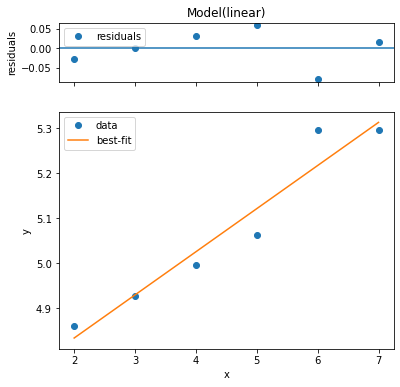

In [31]:
# Line fit to trough diffs
Hg_trough_diff_fit = model_fit_and_plot([2,3,4,5,6,7], Hg_trough_diffs)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 6
    # variables        = 2
    chi-square         = 0.01202998
    reduced chi-square = 0.00300749
    Akaike info crit   = -33.2726795
    Bayesian info crit = -33.6891605
[[Variables]]
    slope:      0.09769582 +/- 0.01310942 (13.42%) (init = 0.09769582)
    intercept:  4.49943539 +/- 0.06309794 (1.40%) (init = 4.499435)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.935


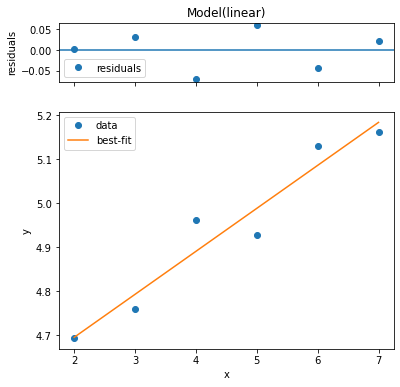

In [32]:
# Line fit to peak diffs
Hg_peak_diff_fit = model_fit_and_plot([2,3,4,5,6,7], Hg_peak_diffs)

### Make a differences plot

Show, on a single plot, the peak position differences, the trough position differences (both as dots) with fit lines for each.  One member of the grou should include this plot in your Group Document.

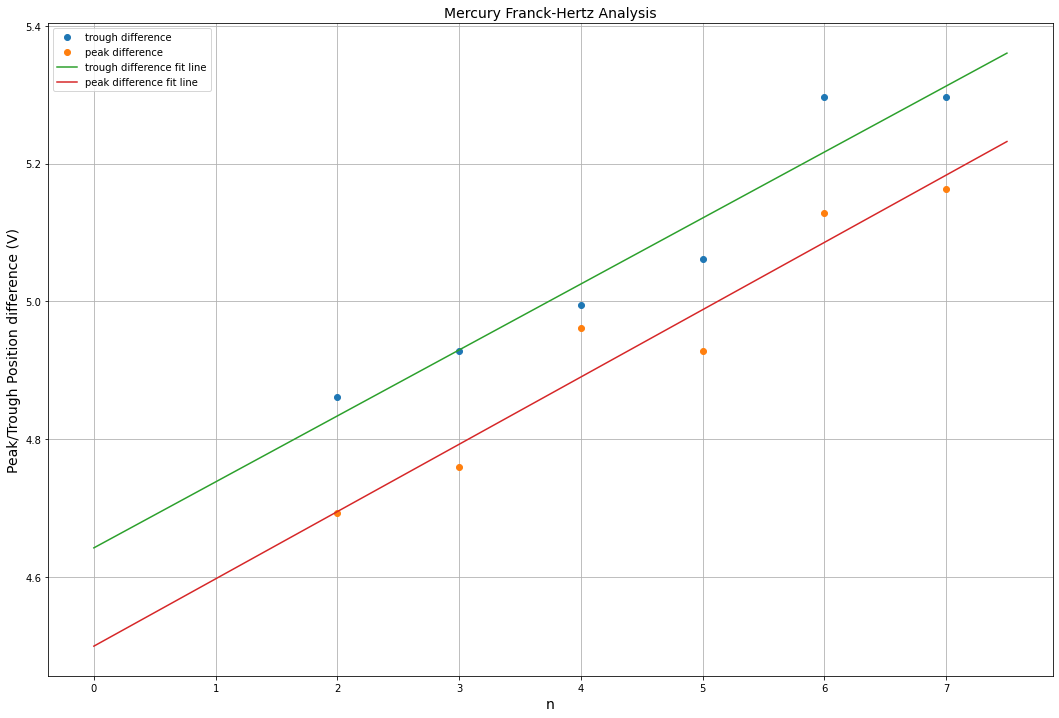

In [33]:
# Plot
xfit = np.linspace(0,7.5,100) 
trough_diff_line = LinearModel().eval(Hg_trough_diff_fit,x=xfit)
peak_diff_line = LinearModel().eval(Hg_peak_diff_fit,x=xfit)

plt.figure(figsize=(18,12))
plt.grid()
plt.title('Mercury Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position difference (V)',fontsize=14)
plt.xlabel('n',fontsize=14)
plt.plot([2,3,4,5,6,7], Hg_trough_diffs, 'o', label='trough difference')
plt.plot([2,3,4,5,6,7], Hg_peak_diffs, 'o', label='peak difference')
plt.plot(xfit, trough_diff_line, label='trough difference fit line')
plt.plot(xfit, peak_diff_line, label='peak difference fit line')

plt.legend();

## Final results for Hg

Calculate the losest excited state energy, as was done for neon. 

In [34]:
print('CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD')
print('Troughs analysis:')
# Your code here
m_tr = unc.ufloat(Hg_trough_diff_fit['slope'].value, Hg_trough_diff_fit['slope'].stderr)
p_tr = unc.ufloat(Hg_trough_diff_fit['intercept'].value, Hg_trough_diff_fit['intercept'].stderr)
a_tr = unc.ufloat(Hg_trough_result_qua['a'].value, Hg_trough_result_qua['a'].stderr)
b_tr = unc.ufloat(Hg_trough_result_qua['b'].value, Hg_trough_result_qua['b'].stderr)
print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p_tr,b_tr-a_tr,b_tr,a_tr))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m_tr,2*a_tr,a_tr))

print('\nPeaks analysis:')
# Your code here
m_pk = unc.ufloat(Hg_peak_diff_fit['slope'].value, Hg_peak_diff_fit['slope'].stderr)
p_pk = unc.ufloat(Hg_peak_diff_fit['intercept'].value, Hg_peak_diff_fit['intercept'].stderr)
a_pk = unc.ufloat(Hg_peak_result_qua['a'].value, Hg_peak_result_qua['a'].stderr)
b_pk = unc.ufloat(Hg_peak_result_qua['b'].value, Hg_peak_result_qua['b'].stderr)
print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p_pk,b_pk-a_pk,b_pk,a_pk))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m_pk,2*a_pk,a_pk))

print('\n\nCALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS')

Ea_trad_pk = unc.ufloat(Hg_peak_result_lin['slope'].value, Hg_peak_result_lin['slope'].stderr)
Ea_trad_tr = unc.ufloat(Hg_trough_result_lin['slope'].value, Hg_trough_result_lin['slope'].stderr)
print('"Traditional" average peak spacing: {:.2uP} eV'.format(Ea_trad_pk))
print('"Traditional" average trough spacing: {:.2uP} eV'.format(Ea_trad_tr))

# From quadratic fit, see E_a as parameter b
# From RSB n=1/2 method, E_a = p + m/2
# Using troughs

# Your code here
print('\nRSB method using line fit to peak/trough position differences: {:.2uP} eV'.format(p_tr+m_tr/2))
# Your code here
print('\nRSB method using quadratic fit to peak/trough positions: {:.2uP} eV'.format(b_tr))

# Your code here


CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD
Troughs analysis:
p ?= b-a: 4.64+/-0.06 ?= 4.62+/-0.03 = 4.67+/-0.03-0.05+/-0.00
m ?= 2a: 0.10+/-0.01 ?= 0.10+/-0.01 = 2*0.05+/-0.00

Peaks analysis:
p ?= b-a: 4.50+/-0.06 ?= 4.50+/-0.03 = 4.55+/-0.03-0.05+/-0.00
m ?= 2a: 0.10+/-0.01 ?= 0.10+/-0.01 = 2*0.05+/-0.00


CALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS
"Traditional" average peak spacing: 4.941±0.038 eV
"Traditional" average trough spacing: 5.069±0.039 eV

RSB method using line fit to peak/trough position differences: 4.690±0.063 eV

RSB method using quadratic fit to peak/trough positions: 4.673±0.032 eV


## Calculation of mean free path $\lambda$

The parameter $\lambda/L$ contains the mean free path between electron collisions.  Calculate this value for Hg given the measureable distance between the cathode and grid $L$.  See photos of the apparatus to obtain this value.

NOTE: You cannot use the word `lambda` as a variable in Python.  It is a keyword (something that is defined by the language).

In [35]:
## Your code here.  Use uncertainty objects and uncertainties in fit parameters to get uncertainty in mean free path.
## Recall a = Ea lambda/L from quadratic fit method
L = 1.2 #cm
mean_free_path_tr = a_tr*L/b_tr
mean_free_path_pk = a_pk*L/b_pk


print('CALCULATION OF MEAN FREE PATH, RSB METHOD\n')
print('Mean free path from troughs fit = {:.2uP} cm'.format(mean_free_path_tr))
print('Mean free path from peaks fit = {:.2uP} cm'.format(mean_free_path_pk))

# Print comparison to RSB results

CALCULATION OF MEAN FREE PATH, RSB METHOD

Mean free path from troughs fit = 0.0127±0.0010 cm
Mean free path from peaks fit = 0.01295±0.00084 cm
